In [1]:
from data_processor import DataProcessor
import numpy as np
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 

In [2]:
def evaluate(model, x_valid, y_valid):
    error = mean_squared_error(y_valid.ravel(), model.predict(x_valid))
    var = np.var(y_valid.ravel())
    #print("The MSE error is: ", error)
    #print("The variance of the validation set is: ", var)
    r_2 = 1 - error / var

    #print("The model explians" ,r_2 ," of the variance in data")
    return r_2
    

In [3]:
file_1 = "../data/Train.csv"
file_2 = "../data/additional_data/trainRoot_edited.csv"

processor = DataProcessor(file_1, file_2, test = False, minimal = True)
x_train, x_valid, y_train, y_valid = processor.get_numpy_data(fillna = True, additional = True,
                                                                            encode = True, np_split = True, enocde_user = False,
                                                                            normalize = True, drop_ones = True)

In [4]:
results = []

In [ ]:
for depth in range (1, 100, 10): 
    for estimators in range(100, 10000, 500): 
        param_dist = {'objective':'reg:squarederror', 'n_estimators':estimators, 'max_depth':depth}
        bst = xgb.XGBRFRegressor(**param_dist)
        #print("=*="*20)
        bst.fit(x_train, y_train.ravel(), eval_set=[(x_valid, y_valid)], verbose = True)
        #print("depth = ",depth, "estimators = ", estimators )
        #results = bst.evals_result()
        r_2 = evaluate(bst, x_valid, y_valid)
        results.append((r_2, depth, estimators))
print(results)

[0]	validation_0-rmse:866.486
[0]	validation_0-rmse:862.927
[0]	validation_0-rmse:863.843
[0]	validation_0-rmse:864.525
[0]	validation_0-rmse:864.846
[0]	validation_0-rmse:865.17
[0]	validation_0-rmse:865.191
[0]	validation_0-rmse:865.394
[0]	validation_0-rmse:865.246
[0]	validation_0-rmse:865.257
[0]	validation_0-rmse:865.301
[0]	validation_0-rmse:865.313


In [ ]:
evaluate(bst, x_valid, y_valid)

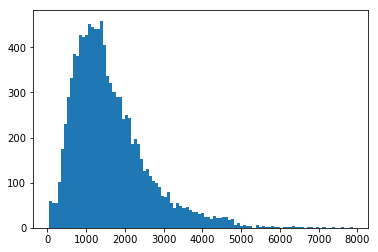

In [9]:
plt.hist(y_train, bins = 100)
plt.show()